In [1]:
import sys
dir_path='../control_transition'
sys.path.append(dir_path)

In [2]:
from plot_utils import *

In [3]:
from importlib import reload


import plot_utils
reload(plot_utils)
from plot_utils import *

In [3]:
from diffusion_utils import *

In [5]:
from importlib import reload


import diffusion_utils
reload(diffusion_utils)
from diffusion_utils import *

# Load

In [4]:
params_list=[
({'nu':0,'de':1,},
{
'p_ctrl':[0.4,0.5,0.6],
# 'p_ctrl':[0.4,0.45,0.5,0.55,0.6],
'p_proj':np.linspace(0.0,0.0,1),
'sC':np.arange(100),
'sm':np.arange(500),
'L':[10,20,30]}
),
]

In [5]:
for fixed_params,vary_params in params_list:
    data_MPS_0_T_dict=generate_params(
        fixed_params=fixed_params,
        vary_params=vary_params,
        fn_template='MPS_({nu},{de})_L{L}_pctrl{p_ctrl:.3f}_pproj{p_proj:.3f}_sC{sC}_sm{sm}_x01_DW_T.json',
        # fn_dir_template='./MPS_0-1_C_m_x00',
        fn_dir_template='../CT_MPS/MPS_0-1_C_m_x01_T',
        # fn_dir_template='./MPS_0-1_C_m_x0',
        input_params_template='{p_ctrl:.3f} {p_proj:.3f} {L} {sC} {sm} ',
        load_data=load_json,
        filename='params_CT_MPS_0_C_m_T.txt',
        filelist=None,
        load=False,
        data_dict=None,
        # data_dict_file='xj({nu},{de})_C_m.pickle', 
        # data_dict_file='xj({nu},{de})_C_m.json', 
    )

generate_params: 100%|██████████| 450000/450000 [00:09<00:00, 47185.22it/s]


In [10]:
zz=load_json('MPS_(0,1)_L10_pctrl0.500_pproj0.000_sC0_sm0_x01_DW_T.json')

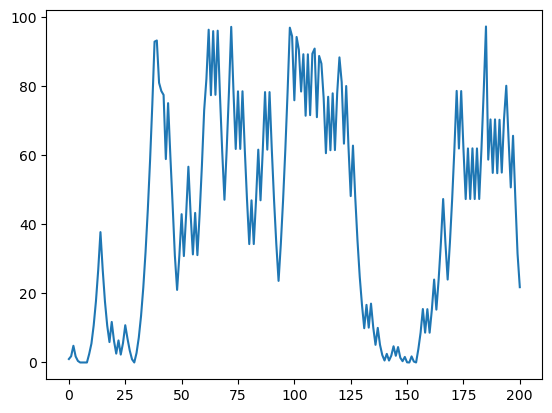

In [13]:
plt.plot(zz['DW2'])

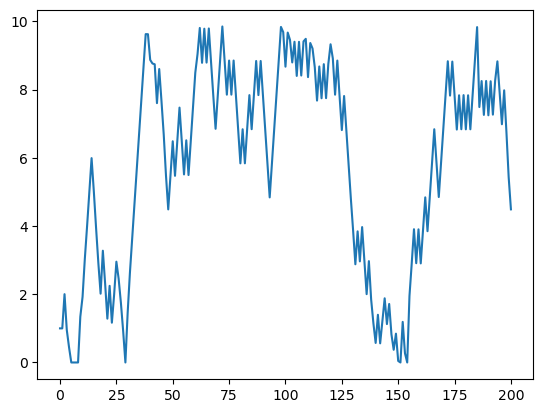

In [14]:
plt.plot(zz['DW1'])